In [272]:
#Data Exploration:

In [273]:
import pandas as pd
df=pd.read_csv("data.csv")

In [274]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

  gender  software  security  calculas  programming
0   male      10.0       6.0       NaN         19.0
1   male       9.0      12.0       9.5         16.0
2   male      12.0       NaN       7.0         18.0
3   male      10.0       6.0       NaN         13.0
4   male      13.0      10.0       NaN         12.0


In [275]:
# Display the last few rows of the dataset to understand its structure
print(df.tail())

    gender  software  security  calculas  programming
453   male      20.0      19.0      18.5          NaN
454   male      20.0      19.0      19.0          NaN
455   male      13.0      13.0      10.0          NaN
456   male      19.0      12.0      20.0          NaN
457   male      15.0      10.0       NaN          NaN


In [276]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       458 non-null    object 
 1   software     453 non-null    float64
 2   security     438 non-null    float64
 3   calculas     371 non-null    float64
 4   programming  221 non-null    float64
dtypes: float64(4), object(1)
memory usage: 18.0+ KB
None


In [277]:
# Summary statistics of the dataset
print(df.describe())

         software    security    calculas  programming
count  453.000000  438.000000  371.000000   221.000000
mean    12.267108   11.954338   14.303504    14.479638
std      3.544496    3.346191    4.063225     3.379859
min      2.000000    3.000000    6.500000     5.000000
25%     10.000000   10.000000   11.000000    12.000000
50%     12.000000   12.000000   14.500000    15.000000
75%     15.000000   14.000000   18.000000    17.000000
max     20.000000   20.000000   20.000000    20.000000


In [278]:
# Get the dimensions of the dataset (number of rows and columns)
print(df.shape)

(458, 5)


In [279]:
# Display the data types of each column
print(df.dtypes)

gender          object
software       float64
security       float64
calculas       float64
programming    float64
dtype: object


In [280]:
# Check for missing values
print("Missing values: \n")
print(df.isnull().sum())

Missing values: 

gender           0
software         5
security        20
calculas        87
programming    237
dtype: int64


In [281]:
# Check for duplicates
print("\nDuplicates:")
print(df.duplicated().sum())


Duplicates:
17


In [282]:
#Data Preprocessing:



In [283]:

# Remove duplicates
df = df.drop_duplicates()

# Print the shape of the DataFrame after removing duplicates to verify
print("DataFrame shape after removing duplicates:", df.shape)


DataFrame shape after removing duplicates: (441, 5)


In [284]:
import pandas as pd
import numpy as np

# Check for missing values
print("Missing values before imputation:")
print(df.isnull().sum())

# Function to impute missing values using row mean (for numeric data)
def impute_with_row_mean(row, exclude_column):
    # Convert relevant values to numeric (handling potential errors)
    row_numeric = pd.to_numeric(row, errors='coerce')

    # Filter columns to use, excluding specified column, 'gender', and non-numeric values
    cols_to_use = [col for col in row_numeric.index if (col != exclude_column) and (col != 'gender') and np.issubdtype(row_numeric[col].dtype, np.number)]

    # Calculate mean only if there are valid values to use
    if cols_to_use:
        row_mean = row_numeric[cols_to_use].mean(skipna=True)
    else:
        row_mean = np.nan

    return row.fillna(row_mean)

# Apply the imputation function row-wise for all columns except 'gender'
all_cols = [col for col in df.columns if col != 'gender']
for col in all_cols:
    df[col] = df.apply(lambda row: impute_with_row_mean(row, 'gender'), axis=1)[col]

# Convert all columns EXCEPT 'gender' to numeric
numeric_cols = [col for col in df.columns if col != 'gender']
df[numeric_cols] = df[numeric_cols].astype(float)

# Check for missing values after imputation and conversion
print("\nMissing values after imputation:")
print(df.isnull().sum())
print(df.tail())


Missing values before imputation:
gender           0
software         5
security        20
calculas        75
programming    222
dtype: int64

Missing values after imputation:
gender         0
software       0
security       0
calculas       0
programming    0
dtype: int64
    gender  software  security  calculas  programming
453   male      20.0      19.0      18.5    19.166667
454   male      20.0      19.0      19.0    19.333333
455   male      13.0      13.0      10.0    12.000000
456   male      19.0      12.0      20.0    17.000000
457   male      15.0      10.0      12.5    12.500000


In [285]:
print(df.tail())
# Check for missing values
print("Missing values: \n")
print(df.isnull().sum())


    gender  software  security  calculas  programming
453   male      20.0      19.0      18.5    19.166667
454   male      20.0      19.0      19.0    19.333333
455   male      13.0      13.0      10.0    12.000000
456   male      19.0      12.0      20.0    17.000000
457   male      15.0      10.0      12.5    12.500000
Missing values: 

gender         0
software       0
security       0
calculas       0
programming    0
dtype: int64


In [286]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])


# Display the encoded DataFrame
print("Encoded DataFrame:")
print(df.head())

Encoded DataFrame:
  gender  software   security   calculas  programming  gender_encoded
0   male      10.0   6.000000  11.666667         19.0               1
1   male       9.0  12.000000   9.500000         16.0               1
2   male      12.0  12.333333   7.000000         18.0               1
3   male      10.0   6.000000   9.666667         13.0               1
4   male      13.0  10.000000  11.666667         12.0               1


In [287]:
print("One-hot encoded 'gender' column: \n")
x=0
y=0
for i in df['gender_encoded']:
  if i==1:
    x+=1
  else:
    y+=1
print("Male:",x)
print("Female:",y)


One-hot encoded 'gender' column: 

Male: 284
Female: 157


In [288]:
from sklearn.preprocessing import MinMaxScaler
# Select the numerical columns to scale
numeric_cols = df.select_dtypes(include='number').columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the scaled DataFrame
print("Scaled DataFrame:")
print(df.head())

Scaled DataFrame:
  gender  software  security  calculas  programming  gender_encoded
0   male  0.444444  0.176471  0.479167       0.9375             1.0
1   male  0.388889  0.529412  0.343750       0.7500             1.0
2   male  0.555556  0.549020  0.187500       0.8750             1.0
3   male  0.444444  0.176471  0.354167       0.5625             1.0
4   male  0.611111  0.411765  0.479167       0.5000             1.0


In [289]:
df.dtypes

gender             object
software          float64
security          float64
calculas          float64
programming       float64
gender_encoded    float64
dtype: object

In [290]:
#Visualization:


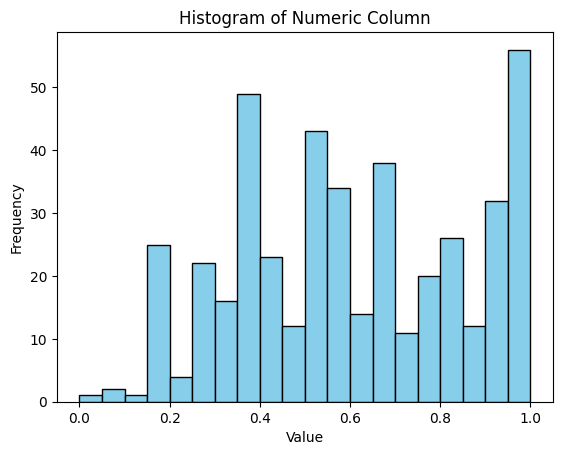

In [291]:
import matplotlib.pyplot as plt

# Example: Create a histogram of a numeric variable
plt.hist(df['calculas'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numeric Column')
plt.show()


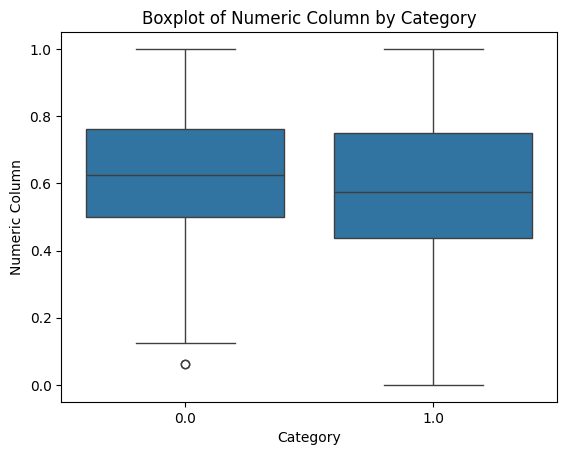

In [292]:
import seaborn as sns

# Example: Create a boxplot to visualize the distribution of a numeric variable by category
sns.boxplot(x='gender_encoded', y='programming', data=df)
plt.xlabel('Category')
plt.ylabel('Numeric Column')
plt.title('Boxplot of Numeric Column by Category')
plt.show()


In [293]:
import plotly.express as px

# Example: Create an interactive scatter plot
fig = px.scatter(df, x='calculas', y='security', color='gender')
fig.update_layout(title='Interactive Scatter Plot', xaxis_title='calculas', yaxis_title='security')
fig.show()


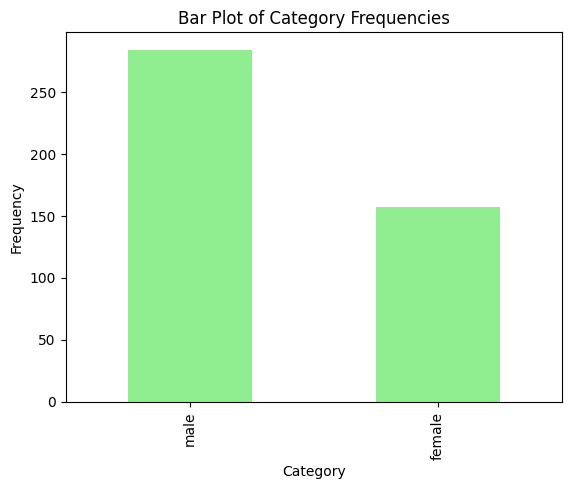

In [294]:
# Example: Create a bar plot of categorical variable frequencies
df['gender'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Plot of Category Frequencies')
plt.show()


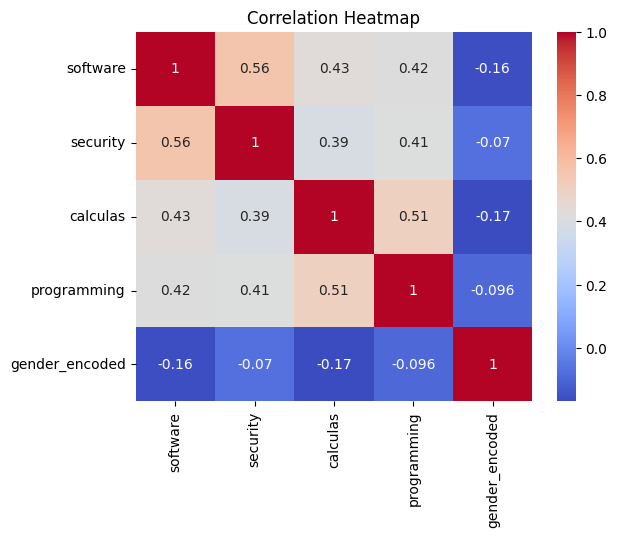

In [295]:
import seaborn as sns
df.drop(columns=['gender'], inplace=True)

# Example using Seaborn
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [296]:
# Assuming 'df' contains the preprocessed DataFrame with features and target variables for each subject
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Define the list of subjects
subjects = ['calculas', 'programming', 'software', 'security','gender_encoded']

# Iterate over each subject
for subject in subjects:
    # Separate features and target variable for the current subject
    X = df[['calculas', 'programming', 'software', 'security','gender_encoded']]  # Features
    y = df[subject]  # Target variable for the current subject

    # Split the dataset into training and testing sets for the current subject
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the regression model for the current subject
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions for the current subject
    predictions = model.predict(X_test)

    # Evaluate the model's performance for the current subject
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print evaluation metrics for the current subject
    print("Subject:", subject)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()


Subject: calculas
Mean Squared Error: 5.008155767891124e-30
Mean Absolute Error: 1.7113339459636366e-15
R-squared: 1.0

Subject: programming
Mean Squared Error: 3.6235614515465464e-32
Mean Absolute Error: 1.5047264308472978e-16
R-squared: 1.0

Subject: software
Mean Squared Error: 2.860635681587873e-30
Mean Absolute Error: 1.3003019385321883e-15
R-squared: 1.0

Subject: security
Mean Squared Error: 2.9595094625867463e-30
Mean Absolute Error: 1.3222880967445684e-15
R-squared: 1.0

Subject: gender_encoded
Mean Squared Error: 6.923087492083489e-32
Mean Absolute Error: 2.1335392607150623e-16
R-squared: 1.0



In [299]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix





# Initialize the classifier (e.g., Logistic Regression)
classifier = LogisticRegression()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))






Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32
         1.0       1.00      1.00      1.00        57

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



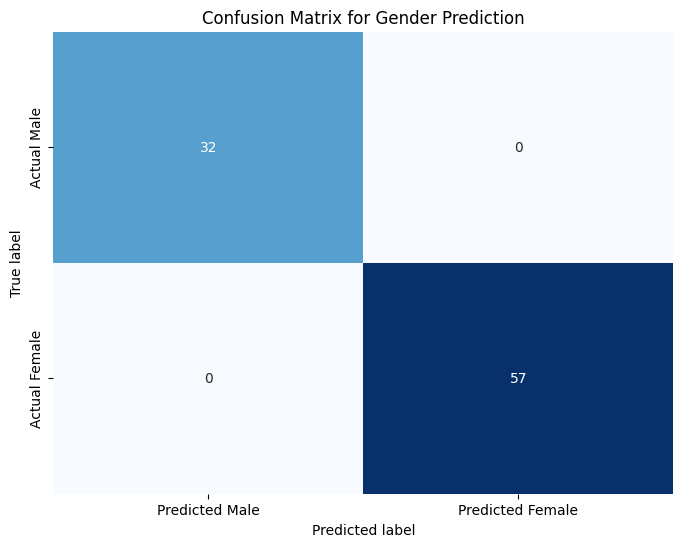

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Male', 'Predicted Female'],
            yticklabels=['Actual Male', 'Actual Female'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Gender Prediction')
plt.show()



In [302]:
# Separate testing dataset into male and female subsets
male_indices = X_test['gender_encoded'] == 1.0
female_indices = X_test['gender_encoded'] == 0.0

X_test_male = X_test[male_indices]
y_test_male = y_test[male_indices]

X_test_female = X_test[female_indices]
y_test_female = y_test[female_indices]

# Make predictions for male and female subsets separately
predictions_male = classifier.predict(X_test_male)
predictions_female = classifier.predict(X_test_female)

# Evaluate model performance for male and female predictions
accuracy_male = accuracy_score(y_test_male, predictions_male)
precision_male = precision_score(y_test_male, predictions_male)
recall_male = recall_score(y_test_male, predictions_male)
f1_male = f1_score(y_test_male, predictions_male)

accuracy_female = accuracy_score(y_test_female, predictions_female)
precision_female = precision_score(y_test_female, predictions_female)
recall_female = recall_score(y_test_female, predictions_female)
f1_female = f1_score(y_test_female, predictions_female)

# Print evaluation metrics for male and female predictions
print("Male Predictions:")
print("Accuracy:", accuracy_male)
print("Precision:", precision_male)
print("Recall:", recall_male)
print("F1-score:", f1_male)

print("\nFemale Predictions:")
print("Accuracy:", accuracy_female)
print("Precision:", precision_female)
print("Recall:", recall_female)
print("F1-score:", f1_female)


Male Predictions:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Female Predictions:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.

